# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Twitch_1.csv")
df.head()

,userName,score,at,content
0,Alpin,5,2024-05-01 19:35:57,Cant connect with provider in my country
1,Kaa Afreza,1,2024-05-01 13:43:23,"I'm what people usually call kaa, from Indones..."
2,Davin Aditya,1,2024-05-01 10:21:39,This aplk dont want me to change username this...
3,Salim Aziz,1,2024-04-30 19:52:13,Angel masuknya cvvk
4,Setiya Setiya,4,2024-04-29 16:01:50,Lumayan


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Cant connect with provider in my country,Alpin,2024-05-01 19:35:57
1,"I'm what people usually call kaa, from Indones...",Kaa Afreza,2024-05-01 13:43:23
2,This aplk dont want me to change username this...,Davin Aditya,2024-05-01 10:21:39
3,Angel masuknya cvvk,Salim Aziz,2024-04-30 19:52:13
4,Lumayan,Setiya Setiya,2024-04-29 16:01:50
...,...,...,...
393,Lovely,Muhammad Abdillah,2023-02-15 16:22:57
394,Porno dan membayar halah keat,Dwi Hermawan,2023-02-13 17:59:22
395,Suspend account,adam mandra,2023-02-13 16:35:30
396,Idk,Rayyan Nara,2023-02-13 00:36:53


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   398 non-null    object
 1   userName  398 non-null    object
 2   at        398 non-null    object
dtypes: object(3)
memory usage: 9.5+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,398,398,398
unique,349,398,398
top,Good,Alpin,2024-05-01 19:35:57
freq,14,1,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(398, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(349, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,cant connect with provider in my country,Alpin,2024-05-01 19:35:57
1,im what people usually call kaa from indonesia...,Kaa Afreza,2024-05-01 13:43:23
2,this aplk dont want me to change username this...,Davin Aditya,2024-05-01 10:21:39
3,angel masuknya cvvk,Salim Aziz,2024-04-30 19:52:13
4,lumayan,Setiya Setiya,2024-04-29 16:01:50
...,...,...,...
392,sumpah demi apa disini lag bgt gomenasai,XxJane_ ChanelxX,2023-02-18 18:14:00
393,lovely,Muhammad Abdillah,2023-02-15 16:22:57
394,porno dan membayar halah keat,Dwi Hermawan,2023-02-13 17:59:22
395,suspend account,adam mandra,2023-02-13 16:35:30


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,cant connect with provider in my country,Alpin,2024-05-01 19:35:57
1,im what people usually call kaa from indonesia...,Kaa Afreza,2024-05-01 13:43:23
2,this aplikasi dont want me to change username ...,Davin Aditya,2024-05-01 10:21:39
3,angel masuknya,Salim Aziz,2024-04-30 19:52:13
4,lumayan,Setiya Setiya,2024-04-29 16:01:50
...,...,...,...
392,sumpah demi apa disini lag sangat gomenasai,XxJane_ ChanelxX,2023-02-18 18:14:00
393,lovely,Muhammad Abdillah,2023-02-15 16:22:57
394,porno dan membayar halah keat,Dwi Hermawan,2023-02-13 17:59:22
395,suspend account,adam mandra,2023-02-13 16:35:30


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,cant connect with provider in my country,Alpin,2024-05-01 19:35:57
1,im what people usually call kaa from indonesia...,Kaa Afreza,2024-05-01 13:43:23
2,this aplikasi dont want me to change username ...,Davin Aditya,2024-05-01 10:21:39
3,angel masuknya,Salim Aziz,2024-04-30 19:52:13
4,lumayan,Setiya Setiya,2024-04-29 16:01:50
...,...,...,...
392,sumpah apa disini lag sangat gomenasai,XxJane_ ChanelxX,2023-02-18 18:14:00
393,lovely,Muhammad Abdillah,2023-02-15 16:22:57
394,porno membayar halah keat,Dwi Hermawan,2023-02-13 17:59:22
395,suspend account,adam mandra,2023-02-13 16:35:30


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [cant, connect, with, provider, in, my, country]
1      [im, what, people, usually, call, kaa, from, i...
2      [this, aplikasi, dont, want, me, to, change, u...
3                                      [angel, masuknya]
4                                              [lumayan]
                             ...                        
392        [sumpah, apa, disini, lag, sangat, gomenasai]
393                                             [lovely]
394                       [porno, membayar, halah, keat]
395                                   [suspend, account]
397    [gw, suka, sama, aplikasi, bisa, melihat, stre...
Name: content, Length: 349, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Twitch_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Twitch_1.csv', encoding = 'latin1')
df_clean

,content
0,cant connect with provider in my country
1,im what people usually call kaa from indonesia...
2,this aplikasi dont want me to change username ...
3,angel masuk
4,lumayan
...,...
344,sumpah apa sini lag sangat gomenasai
345,lovely
346,porno bayar halah keat
347,suspend account


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Twitch_1.csv', encoding='latin1')

In [24]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 13.6MB/s]                   


In [26]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,cant connect with provider in my country
1,im what people usually call kaa from indonesia...
2,this aplikasi dont want me to change username ...
3,angel masuk
4,lumayan
...,...
344,sumpah apa sini lag sangat gomenasai
345,lovely
346,porno bayar halah keat
347,suspend account


In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Twitch_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Twitch_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,cant connect with provider in my country,cant connect with provider in my country
1,1,im what people usually call kaa from indonesia...,im what people usually call kaa from isi lots ...
2,2,this aplikasi dont want me to change username ...,this application dont want me to change userna...
3,3,angel masuk,angel come in.
4,4,lumayan,Not bad.
...,...,...,...
344,344,sumpah apa sini lag sangat gomenasai,What oath is it here? Lag is so loose.
345,345,lovely,lovely
346,346,porno bayar halah keat,Porn pays hale keat
347,347,suspend account,suspend account


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Twitch_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,cant connect with provider in my country,cant connect with provider in my country
1,1,im what people usually call kaa from indonesia...,im what people usually call kaa from isi lots ...
2,2,this aplikasi dont want me to change username ...,this application dont want me to change userna...
3,3,angel masuk,angel come in.
4,4,lumayan,Not bad.
...,...,...,...
344,344,sumpah apa sini lag sangat gomenasai,What oath is it here? Lag is so loose.
345,345,lovely,lovely
346,346,porno bayar halah keat,Porn pays hale keat
347,347,suspend account,suspend account


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 158
Netral = 144
Negatif = 47

Total Data Seluruhnya : 349


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,cant connect with provider in my country,cant connect with provider in my country,Netral
1,1,im what people usually call kaa from indonesia...,im what people usually call kaa from isi lots ...,Negatif
2,2,this aplikasi dont want me to change username ...,this application dont want me to change userna...,Negatif
3,3,angel masuk,angel come in.,Netral
4,4,lumayan,Not bad.,Positif
...,...,...,...,...
344,344,sumpah apa sini lag sangat gomenasai,What oath is it here? Lag is so loose.,Negatif
345,345,lovely,lovely,Positif
346,346,porno bayar halah keat,Porn pays hale keat,Netral
347,347,suspend account,suspend account,Netral


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,cant connect with provider in my country,cant connect with provider in my country,Netral
1,im what people usually call kaa from indonesia...,im what people usually call kaa from isi lots ...,Negatif
2,this aplikasi dont want me to change username ...,this application dont want me to change userna...,Negatif
3,angel masuk,angel come in.,Netral
4,lumayan,Not bad.,Positif
...,...,...,...
344,sumpah apa sini lag sangat gomenasai,What oath is it here? Lag is so loose.,Negatif
345,lovely,lovely,Positif
346,porno bayar halah keat,Porn pays hale keat,Netral
347,suspend account,suspend account,Netral


# **Visualisasi**


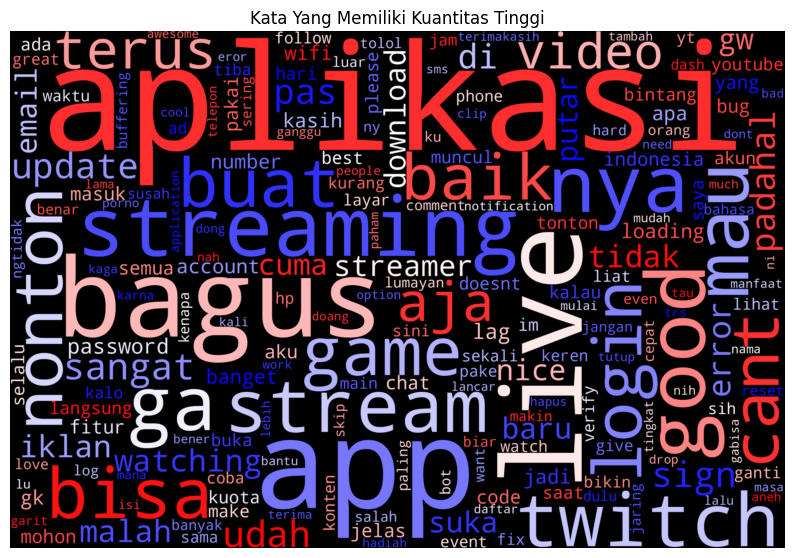

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


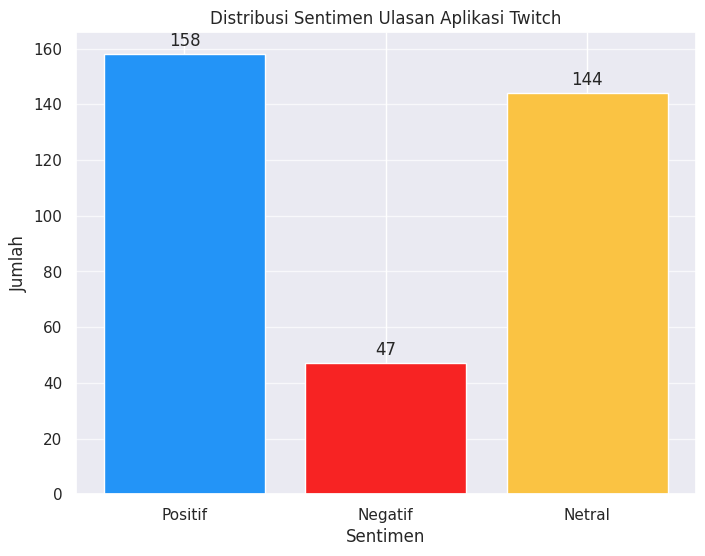

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Twitch")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,im what people usually call kaa from indonesia...,im what people usually call kaa from isi lots ...,Negatif
2,this aplikasi dont want me to change username ...,this application dont want me to change userna...,Negatif
4,lumayan,Not bad.,Positif
7,mohon maaf pihak buat twitch saat login guna s...,I'm sorry for the twitch while logged in for a...,Negatif
8,mau login sign up susah banget eror terus bene...,Want to sign up so hard or else fix the app,Negatif
...,...,...,...
341,enak hadiah buat game tentu walaupun tidak waktu,"It's good. Gifts are for games, of course, eve...",Positif
342,simply awesome,♪ simply awesome ♪,Positif
343,aplikasi sangat bantu,application is very helpful,Positif
344,sumpah apa sini lag sangat gomenasai,What oath is it here? Lag is so loose.,Negatif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,im what people usually call kaa from indonesia...,im what people usually call kaa from isi lots ...,0
2,this aplikasi dont want me to change username ...,this application dont want me to change userna...,0
4,lumayan,Not bad.,1
7,mohon maaf pihak buat twitch saat login guna s...,I'm sorry for the twitch while logged in for a...,0
8,mau login sign up susah banget eror terus bene...,Want to sign up so hard or else fix the app,0
...,...,...,...
341,enak hadiah buat game tentu walaupun tidak waktu,"It's good. Gifts are for games, of course, eve...",1
342,simply awesome,♪ simply awesome ♪,1
343,aplikasi sangat bantu,application is very helpful,1
344,sumpah apa sini lag sangat gomenasai,What oath is it here? Lag is so loose.,0


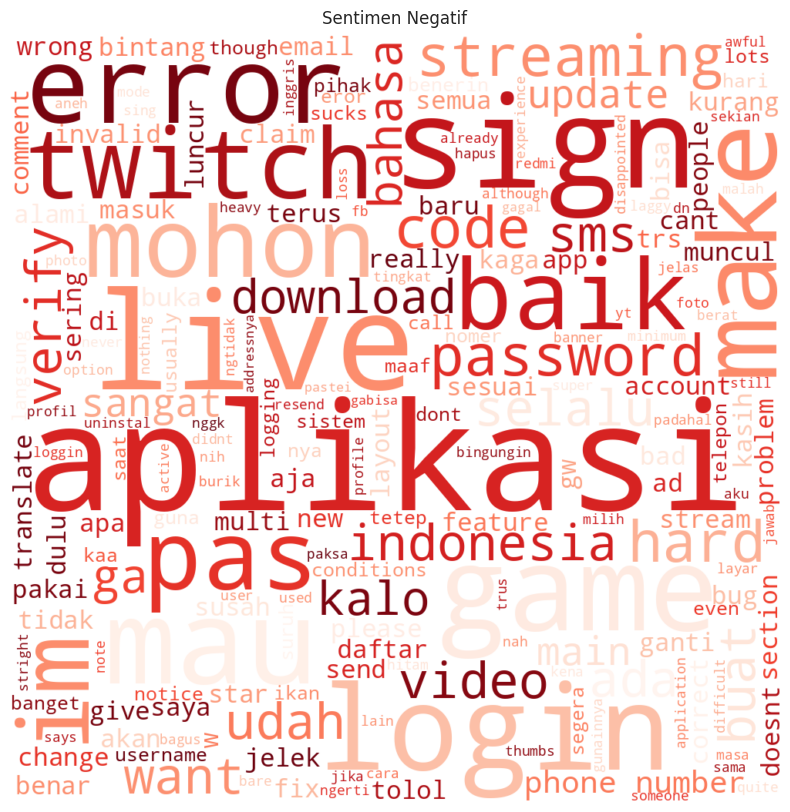

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

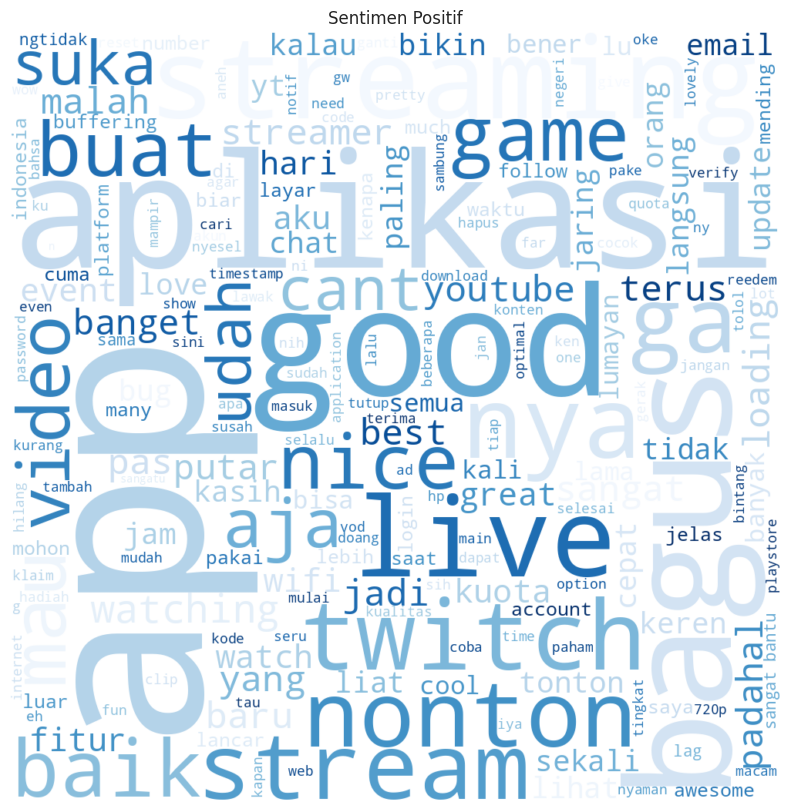

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    158
0     47
Name: count, dtype: int64

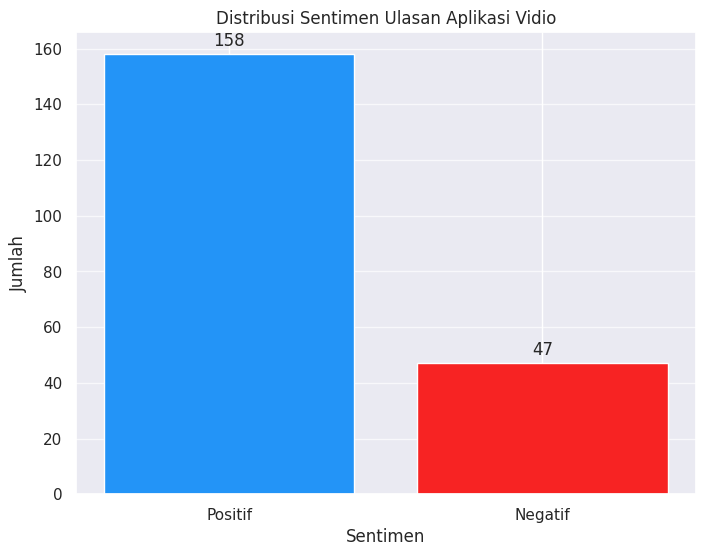

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Vidio")

# **Data Preparation & Modeling**

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [46]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
X_train

119    bug baik masa iya jaring wifi lancar muter vid...
187                            karna kai cenat jadi seru
262                               so many bugs get fixed
160                                                oklah
71     bro i cant even verify my number is saying tha...
                             ...                        
180                                                 cool
28     jelek pas mau live suruh login pas login mau l...
154    event twitch x hsr henti saja adil streaming t...
306                              why so hard for sign up
174    kirain main game dah coba live mana gamenya gk...
Name: content, Length: 164, dtype: object

In [48]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [49]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.9024390243902439
Akurasi untuk c = 0.05: 0.9024390243902439
Akurasi untuk c = 0.25: 0.8536585365853658
Akurasi untuk c = 0.5: 0.8292682926829268
Akurasi untuk c = 0.75: 0.8292682926829268
Akurasi untuk c = 1: 0.8292682926829268


In [52]:
svm = LinearSVC(C = 1.0)
svm.fit(X_train_vec, y_train)

LinearSVC()

In [53]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8292682926829268 


In [54]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.83
[[ 1  3]
 [ 4 33]]
              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.92      0.89      0.90        37

    accuracy                           0.83        41
   macro avg       0.56      0.57      0.56        41
weighted avg       0.85      0.83      0.84        41



# **Testing**


In [58]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasinya sering down , ngelag , overall jelek bgt
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [59]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus buat livestreaming
Hasil Analisis Sentimen Untuk Teks Baru : Positif
